## Import packages and initialise
#### To start off we just need to import the maincode and also set the Galactocentric Rsun position of the Sun. Here, for example we adopt the value from Gravity Collaboration 2021

In [1]:
import SpiralMap as sp
from SpiralMap import polar_style
import matplotlib  as mpl
import matplotlib.pyplot as plt
Rsun= 8.277

import os
figdpi = 1000
figdir = 'tempfig'
os.system('rm -rf '+figdir); os.system('mkdir '+figdir)

0

In [2]:
sp.__version__

'0.0.21'

#### Next, we need to initialise the main class by passing in Rsun, doing so also prints out the list of models currently included,

In [3]:
spirals = sp.main_(Rsun=Rsun)

try self.getinfo(model) for more details
+----+----------------------------+---------------------------+
|    | Available models & maps:   | Description               |
|----+----------------------------+---------------------------|
|  0 | Taylor_Cordes_1992         | HII                       |
|  1 | Drimmel_NIR_2000           | NIR emission              |
|  2 | Levine_2006                | HI                        |
|  3 | Hou_Han_2014               | HII/GMC/Masers            |
|  4 | Hou_Han_HII_2014           | HII                       |
|  5 | Reid_2019                  | MASER parallax            |
|  6 | Poggio_cont_2021           | Upper main sequence (map) |
|  7 | GaiaPVP_cont_2022          | OB stars (map)            |
|  8 | Drimmel_Ceph_2024          | Cepheids                  |
+----+----------------------------+---------------------------+


#### This information can also be extracted by calling

In [4]:
spirals.getinfo()

try self.getinfo(model) for more details
+----+----------------------------+---------------------------+
|    | Available models & maps:   | Description               |
|----+----------------------------+---------------------------|
|  0 | Taylor_Cordes_1992         | HII                       |
|  1 | Drimmel_NIR_2000           | NIR emission              |
|  2 | Levine_2006                | HI                        |
|  3 | Hou_Han_2014               | HII/GMC/Masers            |
|  4 | Hou_Han_HII_2014           | HII                       |
|  5 | Reid_2019                  | MASER parallax            |
|  6 | Poggio_cont_2021           | Upper main sequence (map) |
|  7 | GaiaPVP_cont_2022          | OB stars (map)            |
|  8 | Drimmel_Ceph_2024          | Cepheids                  |
+----+----------------------------+---------------------------+


#### To get details on a particular model (such as the number of arms, their names if available, and the default colours), let's say we are interested in the `Drimmel\_Ceph\_2024' model  we can call :

In [5]:
spirals.getinfo(model='Drimmel_Ceph_2024')

#####################
Model = Drimmel_Ceph_2024
+----+------------+----------+
|    | Arm list   | Colour   |
|----+------------+----------|
|  0 | Scutum     | C3       |
|  1 | Sag-Car    | C0       |
|  2 | Orion      | C1       |
|  3 | Perseus    | C2       |
+----+------------+----------+


## Extracting and plotting data
#### The main class needs a set of attributes passed in, before we can extract or plot data. Internally this set is provided by default, and the columns can be viewed by calling the line below.

In [6]:
spirals.plotattrs_default

{'plot': False,
 'markersize': 3,
 'coordsys': 'HC',
 'linewidth': 0.5,
 'linestyle': '-',
 'armcolour': '',
 'markSunGC': True,
 'xmin': '',
 'xmax': '',
 'ymin': '',
 'ymax': '',
 'polarproj': False,
 'polargrid': False,
 'dataloc': '/opt/anaconda3/lib/python3.12/site-packages/SpiralMap/datafiles'}

#### Let's say we are interested in the Drimmel_Ceph_2024 model, where we saw above that it has four unique arms that one could extract the data for and plot individually. To do so we can use the readout function which needs the name of the model and the name of the arm we are interested in. It also needs a dictionary called plotatttrs i.e., the plot attributes. In the example below, we readout the `Sag-Car' arm from the Drimmel_Ceph_2024' model without returning a plot,

In [7]:
Rsun=8.277
spirals = sp.main_(Rsun=Rsun)	
use_model = 'Drimmel_Ceph_2024'
spirals.getinfo(model=use_model)
plotattrs = {'plot':False}
spirals.readout(plotattrs,model=use_model,arm='Sag-Car')

try self.getinfo(model) for more details
+----+----------------------------+---------------------------+
|    | Available models & maps:   | Description               |
|----+----------------------------+---------------------------|
|  0 | Taylor_Cordes_1992         | HII                       |
|  1 | Drimmel_NIR_2000           | NIR emission              |
|  2 | Levine_2006                | HI                        |
|  3 | Hou_Han_2014               | HII/GMC/Masers            |
|  4 | Hou_Han_HII_2014           | HII                       |
|  5 | Reid_2019                  | MASER parallax            |
|  6 | Poggio_cont_2021           | Upper main sequence (map) |
|  7 | GaiaPVP_cont_2022          | OB stars (map)            |
|  8 | Drimmel_Ceph_2024          | Cepheids                  |
+----+----------------------------+---------------------------+
#####################
Model = Drimmel_Ceph_2024
+----+------------+----------+
|    | Arm list   | Colour   |
|----+-----------

#### this generates a dictionary called `dout' which contains the cartesian and polar trace of the arm.

In [8]:
 list(spirals.dout.keys())

['xhc',
 'yhc',
 'xgc',
 'ygc',
 'xhc_ex',
 'yhc_ex',
 'xgc_ex',
 'ygc_ex',
 'rgc',
 'phi1',
 'phi4',
 'glon4',
 'glon',
 'glat',
 'dhelio',
 'rgc_ex',
 'phi1_ex',
 'phi4_ex',
 'glon4_ex',
 'glon_ex',
 'glat_ex',
 'dhelio_ex']

#### and in order to plot this particular arm we can add more arguments to plotatttrs, in the following example we will plot it in `HC', `GC' frames, and also in the `GC' frame with a polar grid overplotted. For each arm there are preset colours but the user can also provide this in plotatttrs,

try self.getinfo(model) for more details


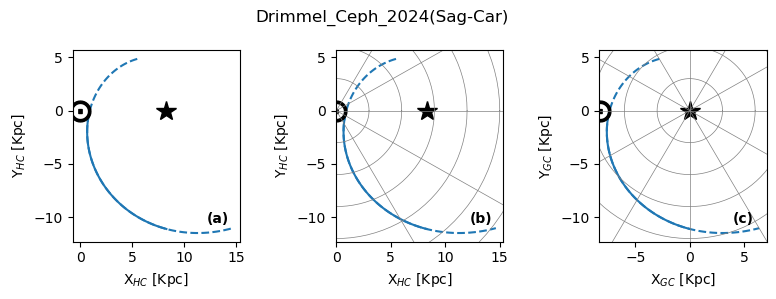

In [9]:
## plotting a single arm together in HC, GC, GC(with polar gid) styles
Rsun=8.277
spirals = sp.main_(Rsun=Rsun,print_=False)
use_model =  'Drimmel_Ceph_2024' 
use_arm = 'Sag-Car' 
            
import matplotlib.gridspec as gridspec

plt.close('all')
fig = plt.figure(figsize=(8, 3))

fig.add_subplot(1,3,1)
plotattrs = {'plot':True,'coordsys':'HC','markersize':15,'markSunGC':True}
spirals.readout(plotattrs,model=use_model,arm=use_arm)
plt.text(0.8,0.1,'(a)' ,transform=plt.gca().transAxes,weight='bold')

fig.add_subplot(1,3,2)
plotattrs = {'plot':True,'coordsys':'HC','markersize':15,'markSunGC':True,'polargrid':True}
spirals.readout(plotattrs,model=use_model,arm=use_arm)
plt.text(0.8,0.1,'(b)' ,transform=plt.gca().transAxes,weight='bold')

fig.add_subplot(1,3,3)
plotattrs = {'plot':True,'coordsys':'GC','markersize':15,'markSunGC':True,'polargrid':True}
spirals.readout(plotattrs,model=use_model,arm=use_arm)
plt.text(0.8,0.1,'(c)' ,transform=plt.gca().transAxes,weight='bold')

fig.suptitle(use_model+'('+use_arm+')')
fig.tight_layout()
plt.savefig(figdir+'/single_arm_single_model.pdf', dpi=figdpi)

#### Instead of plotting one arm at a time, it is also possible to plot all the available arms at once in a given model, by setting plotattrs[`arm']=`all'. In the following example (\autoref{fig:single_all_arms_demo}) we do this for the same model as above and in the same frames: 

try self.getinfo(model) for more details


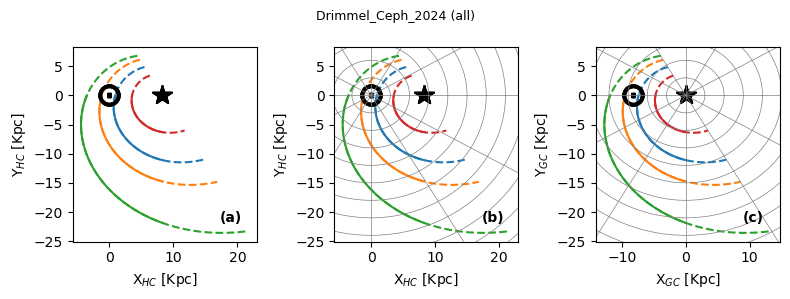

In [10]:
## plotting all the arms together in HC, GC, GC(with polar gid) styles
Rsun=8.277
spirals = sp.main_(Rsun=Rsun,print_=False)
use_model =  'Drimmel_Ceph_2024' 
use_arm = 'all' 

import matplotlib.gridspec as gridspec

plt.close('all')
fig = plt.figure(figsize=(8, 3))

fig.add_subplot(1,3,1)
plotattrs = {'plot':True,'coordsys':'HC','markersize':15,'markSunGC':True}
spirals.readout(plotattrs,model=use_model,arm=use_arm)
plt.text(0.8,0.1,'(a)' ,transform=plt.gca().transAxes,weight='bold')

fig.add_subplot(1,3,2)
plotattrs = {'plot':True,'coordsys':'HC','markersize':15,'markSunGC':True,'polargrid':True}
spirals.readout(plotattrs,model=use_model,arm=use_arm)
plt.text(0.8,0.1,'(b)' ,transform=plt.gca().transAxes,weight='bold')

fig.add_subplot(1,3,3)
plotattrs = {'plot':True,'coordsys':'GC','markersize':15,'markSunGC':True,'polargrid':True}
spirals.readout(plotattrs,model=use_model,arm=use_arm)
plt.text(0.8,0.1,'(c)' ,transform=plt.gca().transAxes,weight='bold')

fig.suptitle(use_model+' ('+use_arm+')',fontsize=9)
fig.tight_layout()
plt.savefig(figdir+'/all_arms_single_model.pdf', dpi=figdpi)

try self.getinfo(model) for more details
try self.getinfo(model) for more details


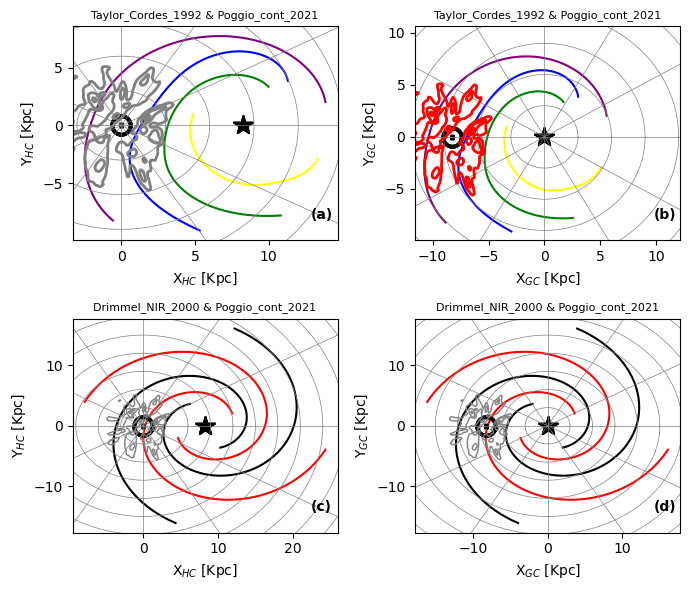

In [11]:
## plotting multiple models together on a cartesian grid
Rsun=8.277
spirals = sp.main_(Rsun=Rsun,print_=False)
use_model = 'Taylor_Cordes_1992'
use_arm = 'all'
use_model2 = 'Poggio_cont_2021'
    
plt.close('all')	
fig = plt.figure(figsize=(7.,6.))	
ax = plt.subplot(221)
plotattrs = {'plot':True,'coordsys':'HC','markersize':15,'markSunGC':True,'polargrid':True}
spirals.readout(plotattrs,model=use_model,arm=use_arm)	
plotattrs = {'plot':True,'coordsys':'HC','markersize':2}	
spirals.readout(plotattrs,model=use_model2,arm='all')	
plt.text(0.9,0.1,'(a)' ,transform=plt.gca().transAxes,weight='bold')
plt.title(use_model+' & '+use_model2,fontsize=8)

#	
ax = plt.subplot(222)
plotattrs = {'plot':True,'coordsys':'GC','markersize':15,'markSunGC':True,'polargrid':True}
spirals.readout(plotattrs,model=use_model,arm=use_arm,print_=False)	
plotattrs = {'plot':True,'coordsys':'GC','markersize':2,'armcolour':'red'}	
spirals.readout(plotattrs,model=use_model2,arm='all',print_=False)
plt.text(0.9,0.1,'(b)' ,transform=plt.gca().transAxes,weight='bold')
plt.title(use_model+' & '+use_model2,fontsize=8)

# 
spirals = sp.main_(Rsun=Rsun,print_=False)
use_model = 'Drimmel_NIR_2000'
use_arm = 'all'
use_model2 = 'Poggio_cont_2021' 	
					
ax = plt.subplot(223)
plotattrs = {'plot':True,'coordsys':'HC','markersize':15,'markSunGC':True,'polargrid':True}
spirals.readout(plotattrs,model=use_model,arm=use_arm)	
plotattrs = {'plot':True,'coordsys':'HC','markersize':1}	
spirals.readout(plotattrs,model=use_model2,arm='all')
plt.text(0.9,0.1,'(c)' ,transform=plt.gca().transAxes,weight='bold')
plt.title(use_model+' & '+use_model2,fontsize=8)


#	
ax = plt.subplot(224)		
plotattrs = {'plot':True,'coordsys':'GC','markersize':15,'markSunGC':True,'polargrid':True}
spirals.readout(plotattrs,model=use_model,arm=use_arm)	
plotattrs = {'plot':True,'coordsys':'GC','markersize':1}	
spirals.readout(plotattrs,model=use_model2,arm='all')
plt.text(0.9,0.1,'(d)' ,transform=plt.gca().transAxes,weight='bold')
plt.title(use_model+' & '+use_model2,fontsize=8)

plt.tight_layout()
plt.savefig(figdir+'/multiple_models_cartesian.pdf', dpi=figdpi)

#### Another available option is to plot in polar projection. We illustrate this with the HouHan model, showing the the polar projection for a single arm (and for all arms together) in both Heliocentric & Galactocentric frames.


try self.getinfo(model) for more details


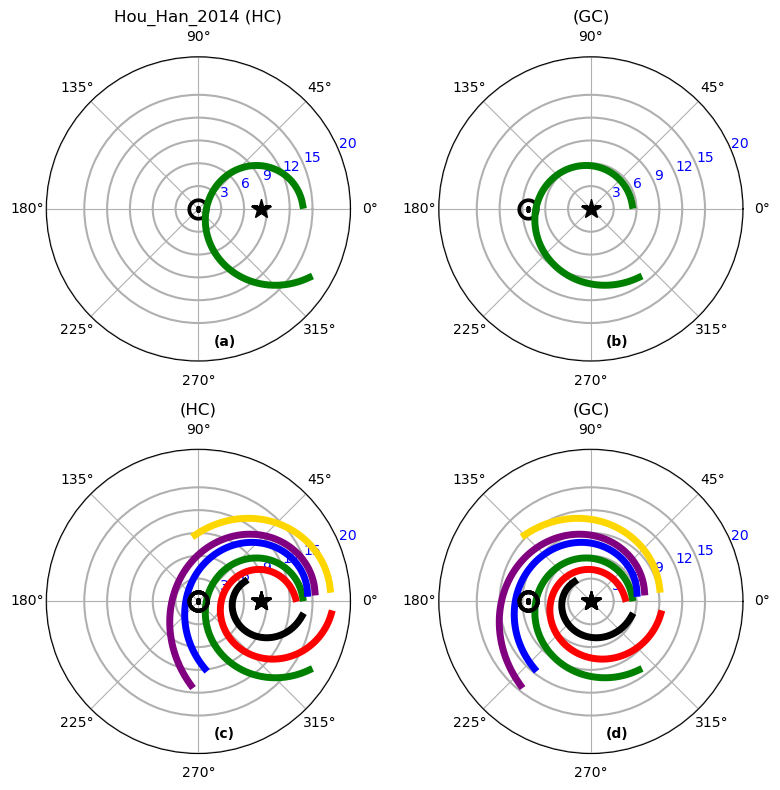

In [16]:
## plotting in polar projection
Rsun=8.277
spirals = sp.main_(Rsun=Rsun,print_=False)
use_model = 'Hou_Han_2014'
use_arm = 'Sagittarius-Carina'
    			

plt.close('all')

fig = plt.figure(figsize=(8,8.))

ax = plt.subplot(221, projection='polar')
plotattrs = {'plot':True,'coordsys':'HC','markersize':15,'markSunGC':True,'polarproj':True,'linewidth':5}
spirals.readout(plotattrs,model=use_model,arm=use_arm)	
polar_style(ax,title=use_model+' (HC)')
plt.text(0.55,0.05,'(a)' ,transform=plt.gca().transAxes,weight='bold')
    
ax = plt.subplot(222, projection='polar')
plotattrs = {'plot':True,'coordsys':'GC','markersize':15,'markSunGC':True,'polarproj':True,'linewidth':5}
spirals.readout(plotattrs,model=use_model,arm=use_arm)
polar_style(ax,title='(GC)')
plt.text(0.55,0.05,'(b)' ,transform=plt.gca().transAxes,weight='bold')

ax = plt.subplot(223, projection='polar')
plotattrs = {'plot':True,'coordsys':'HC','markersize':15,'markSunGC':True,'polarproj':True,'linewidth':5}
spirals.readout(plotattrs,model=use_model,arm='all')
polar_style(ax,title='(HC)')
plt.text(0.55,0.05,'(c)' ,transform=plt.gca().transAxes,weight='bold')

ax = plt.subplot(224, projection='polar')
plotattrs = {'plot':True,'coordsys':'GC','markersize':15,'markSunGC':True,'polarproj':True,'linewidth':5}
spirals.readout(plotattrs,model=use_model,arm='all')
polar_style(ax,title='(GC)')
plt.text(0.55,0.05,'(d)' ,transform=plt.gca().transAxes,weight='bold')

plt.tight_layout()
plt.savefig(figdir+'/single_model_polar.pdf', dpi=figdpi)


#### One can also then plot together multiple models,

try self.getinfo(model) for more details


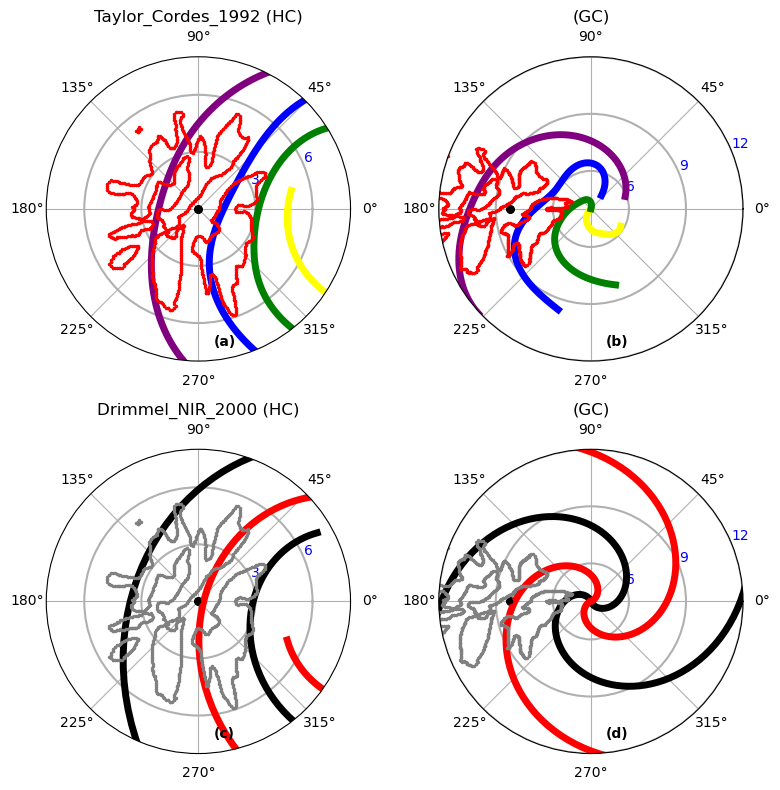

In [18]:
## Plotting multiple models together
Rsun=8.277
spirals = sp.main_(Rsun=Rsun,print_=False)
use_model = 'Taylor_Cordes_1992'
use_arm = 'all'
use_model2 = 'Poggio_cont_2021'
    			

plt.close('all')	
fig = plt.figure(figsize=(8.,8.))	
# 
ax = plt.subplot(221, projection='polar')
plotattrs = {'plot':True,'coordsys':'HC','markersize':5,'markSunGC':True,'polarproj':True,'linewidth':5}
spirals.readout(plotattrs,model=use_model,arm=use_arm)	
plotattrs = {'plot':True,'coordsys':'HC','markersize':3,'polarproj':True,'armcolour':'red'}	
spirals.readout(plotattrs,model=use_model2,arm='all')	
polar_style(ax,title=use_model+' (HC)')
ax.set_ylim([0.,8])	
plt.text(0.55,0.05,'(a)' ,transform=plt.gca().transAxes,weight='bold')

#	
ax = plt.subplot(222, projection='polar')
plotattrs = {'plot':True,'coordsys':'GC','markersize':5,'markSunGC':True,'polarproj':True,'linewidth':5}
spirals.readout(plotattrs,model=use_model,arm=use_arm)	
plotattrs = {'plot':True,'coordsys':'GC','markersize':3,'polarproj':True,'armcolour':'red'}	
spirals.readout(plotattrs,model=use_model2,arm='all')
polar_style(ax,title='(GC)')
ax.set_ylim([4.,12])	
plt.text(0.55,0.05,'(b)' ,transform=plt.gca().transAxes,weight='bold')

# 
use_model = 'Drimmel_NIR_2000'
use_arm = 'all'
use_model2 = 'Poggio_cont_2021' 						
ax = plt.subplot(223, projection='polar')
plotattrs = {'plot':True,'coordsys':'HC','markersize':5,'markSunGC':True,'polarproj':True,'linewidth':5}
spirals.readout(plotattrs,model=use_model,arm=use_arm)	
plotattrs = {'plot':True,'coordsys':'HC','markersize':3,'polarproj':True,'armcolour':'grey'}	
spirals.readout(plotattrs,model=use_model2,arm='all')
polar_style(ax,title=use_model+' (HC)')
ax.set_ylim([0.,8])
plt.text(0.55,0.05,'(c)' ,transform=plt.gca().transAxes,weight='bold')

#		
ax = plt.subplot(224, projection='polar')
plotattrs = {'plot':True,'coordsys':'GC','markersize':5,'markSunGC':True,'polarproj':True,'linewidth':5}
spirals.readout(plotattrs,model=use_model,arm=use_arm)	
plotattrs = {'plot':True,'coordsys':'GC','markersize':3,'polarproj':True,'armcolour':'grey'}	
spirals.readout(plotattrs,model=use_model2,arm='all')
polar_style(ax,title='(GC)')
ax.set_ylim([4.,12])	
plt.text(0.55,0.05,'(d)' ,transform=plt.gca().transAxes,weight='bold')

plt.tight_layout()
plt.savefig(figdir+'/multiple_models_polar.pdf', dpi=figdpi)